In [5]:
import pandas as pd
import matplotlib.pyplot as plt

read_data0 = pd.read_csv('dataset0.csv')
read_data1 = pd.read_csv('dataset1.csv')

read_data0 = read_data0[["name", "neighborhood"]]
read_data1 = read_data1[["hood", "acres"]]

read_data1.columns = ['neighborhood', 'space']

read_data0 = read_data0.groupby('neighborhood').agg({
    'name': 'nunique'
})
read_data0.columns = ['playground_count']

read_data1 = read_data1.groupby('neighborhood').agg({
    'space': 'first'
})

read_data0 = read_data0.reset_index()
read_data1 = read_data1.reset_index()

data = pd.merge(read_data0, read_data1, on='neighborhood', how='inner')
data = data.dropna()
data = data.set_index('neighborhood')
data = data.drop('Perry North', axis=0) # Faulty Data Point
data = data.reset_index()
data = data.sort_values(by='space', ascending=False)

## My Metric
- Amount of area occupied by the Neighborhood

powered by the [Pittsburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2) dataset.

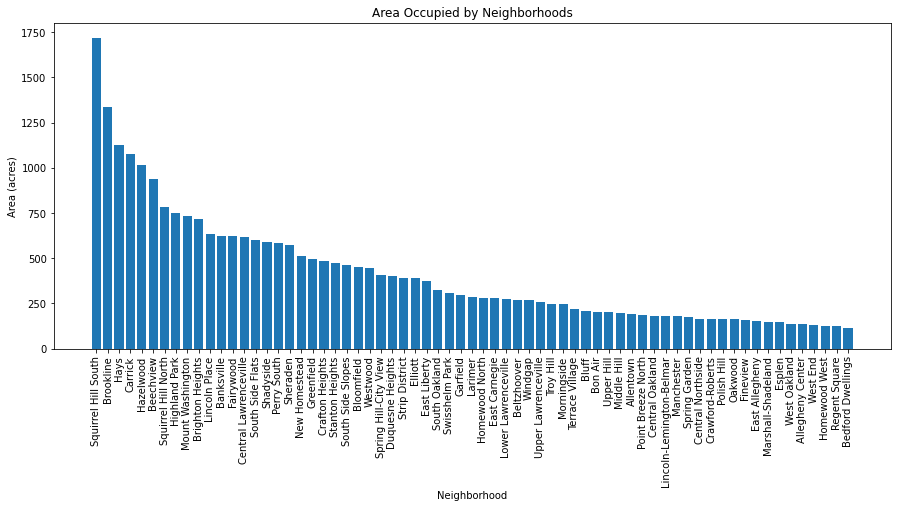

In [6]:
plt.figure(figsize=(15, 6))
plt.bar(data['neighborhood'], data['space'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Area (acres)')
plt.title ('Area Occupied by Neighborhoods')
plt.show()

I chose this metric because a large neighborhood is typically a good neighborhood. The dataset accurately gives us the area (in acres) occupied by each Pittsburgh Neighborhood.

From the graph, it can be inferred that *Squirrel Hill South* has the most area out of all the neighborhoods.